# GlucoSense- AI-Powered Diabetes Detection for Early Intervention

# Project Overview

his project aims to build a machine-learning model that classifies individuals as diabetic or non-diabetic based on early medical indicators. The dataset used for this analysis is the Early Diabetes Classification Dataset from Kaggle, which includes key health features such as glucose levels, BMI, age, and insulin levels. The goal is to predict the likelihood of an individual developing diabetes, providing a valuable tool for early intervention and risk assessment.

## Objective

This project focuses on building a machine learning model to predict the likelihood of an individual being diabetic, pre-diabetic, or healthy. By analyzing healthcare statistics and lifestyle factors, the project aims to assist in early detection and intervention, enabling better diabetes management and prevention strategies.

### Methodology

1. Data Collection and Preprocessing
Dataset: The dataset used is the Early Diabetes Classification Dataset, which contains health-related features like glucose levels, BMI, age, and insulin levels.

Data Preprocessing: Clean the dataset by handling missing values, outliers, and class imbalances. Data normalization will be applied to scale numerical values appropriately.

2. Feature Selection and Model Building
Feature Selection: To select important features, use correlation analysis, statistical tests, and machine learning techniques like Recursive Feature Elimination (RFE).

Model Building: Implement and compare different machine learning models such as Logistic Regression, Random Forest, XGBoost, and Support Vector Machines (SVM).

3. Model Evaluation and Validation
Evaluation Metrics: Evaluate models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to ensure high performance and generalization.
Cross-Validation: Use techniques like k-fold cross-validation to validate the model's robustness and prevent overfitting.

4. Final Presentation and Reporting
Present the results and insights gained from the model, including the most significant features contributing to the risk of diabetes

###  Importing Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


### Importing the Dataset

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\ADITYA\Desktop\diabetes_dataset.csv" )

# Display the first few rows of the dataset
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Data information

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

### EDA

In this step, we focus on preparing the data for modeling by addressing missing values, outliers, and duplicates. First, we identify and handle missing values using imputation or removal strategies based on the feature type. Next, we detect and address outliers using statistical methods like Z-score or IQR to prevent distortion in the model. Duplicates are checked and removed if necessary. Lastly, we ensure consistency in data types, correcting any inconsistencies to maintain data integrity before model training.

## Removing duplicates values

In [3]:
# Check for duplicates
data = pd.read_csv(r"C:\Users\ADITYA\Desktop\diabetes_dataset.csv" )
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Drop duplicates if they exist

if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")

Number of duplicate rows: 269
Duplicates removed.


In [4]:
count = data['class'].value_counts()
print(count)

class
1    173
0     78
Name: count, dtype: int64


### Missing Values

In [5]:
data.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

**As we can see there is no null value**

### Histogram

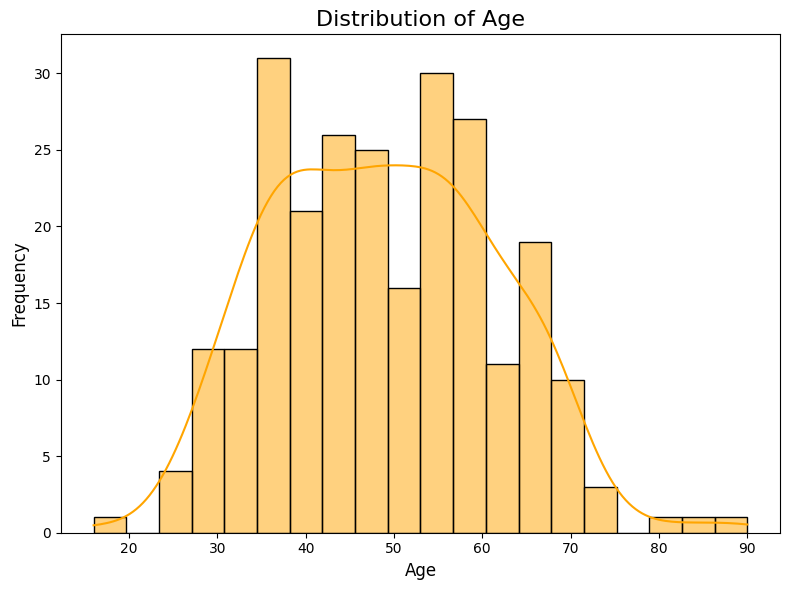

In [9]:
# Set the color palette to a different one
sns.set_palette("viridis")

# Plot the histogram for the 'age' column with KDE
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, color='orange', bins=20)

# Customize the plot
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Improve layout and display the plot
plt.tight_layout()
plt.show()


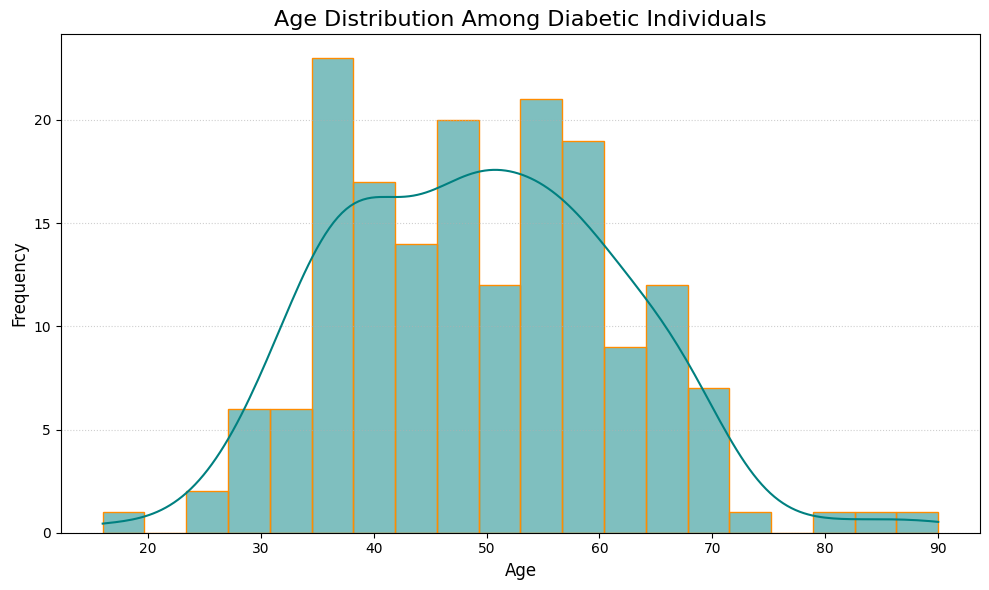

Summary Statistics for Age of Diabetic Individuals:
 count    173.000000
mean      49.306358
std       12.410321
min       16.000000
25%       39.000000
50%       49.000000
75%       58.000000
max       90.000000
Name: age, dtype: float64


In [10]:
diabetic_data = data[data['class'] == 1]


plt.figure(figsize=(10, 6))

# Using a histogram with KDE to visualize the age distribution
sns.histplot(diabetic_data['age'], bins=20, kde=True, color='teal', edgecolor='darkorange')

# Add title and labels
plt.title("Age Distribution Among Diabetic Individuals", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(axis='y', linestyle=':', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

# Display summary statistics for age in diabetic individuals
age_stats = diabetic_data['age'].describe()
print("Summary Statistics for Age of Diabetic Individuals:\n", age_stats)


## Age Distribution by Diabetes Status

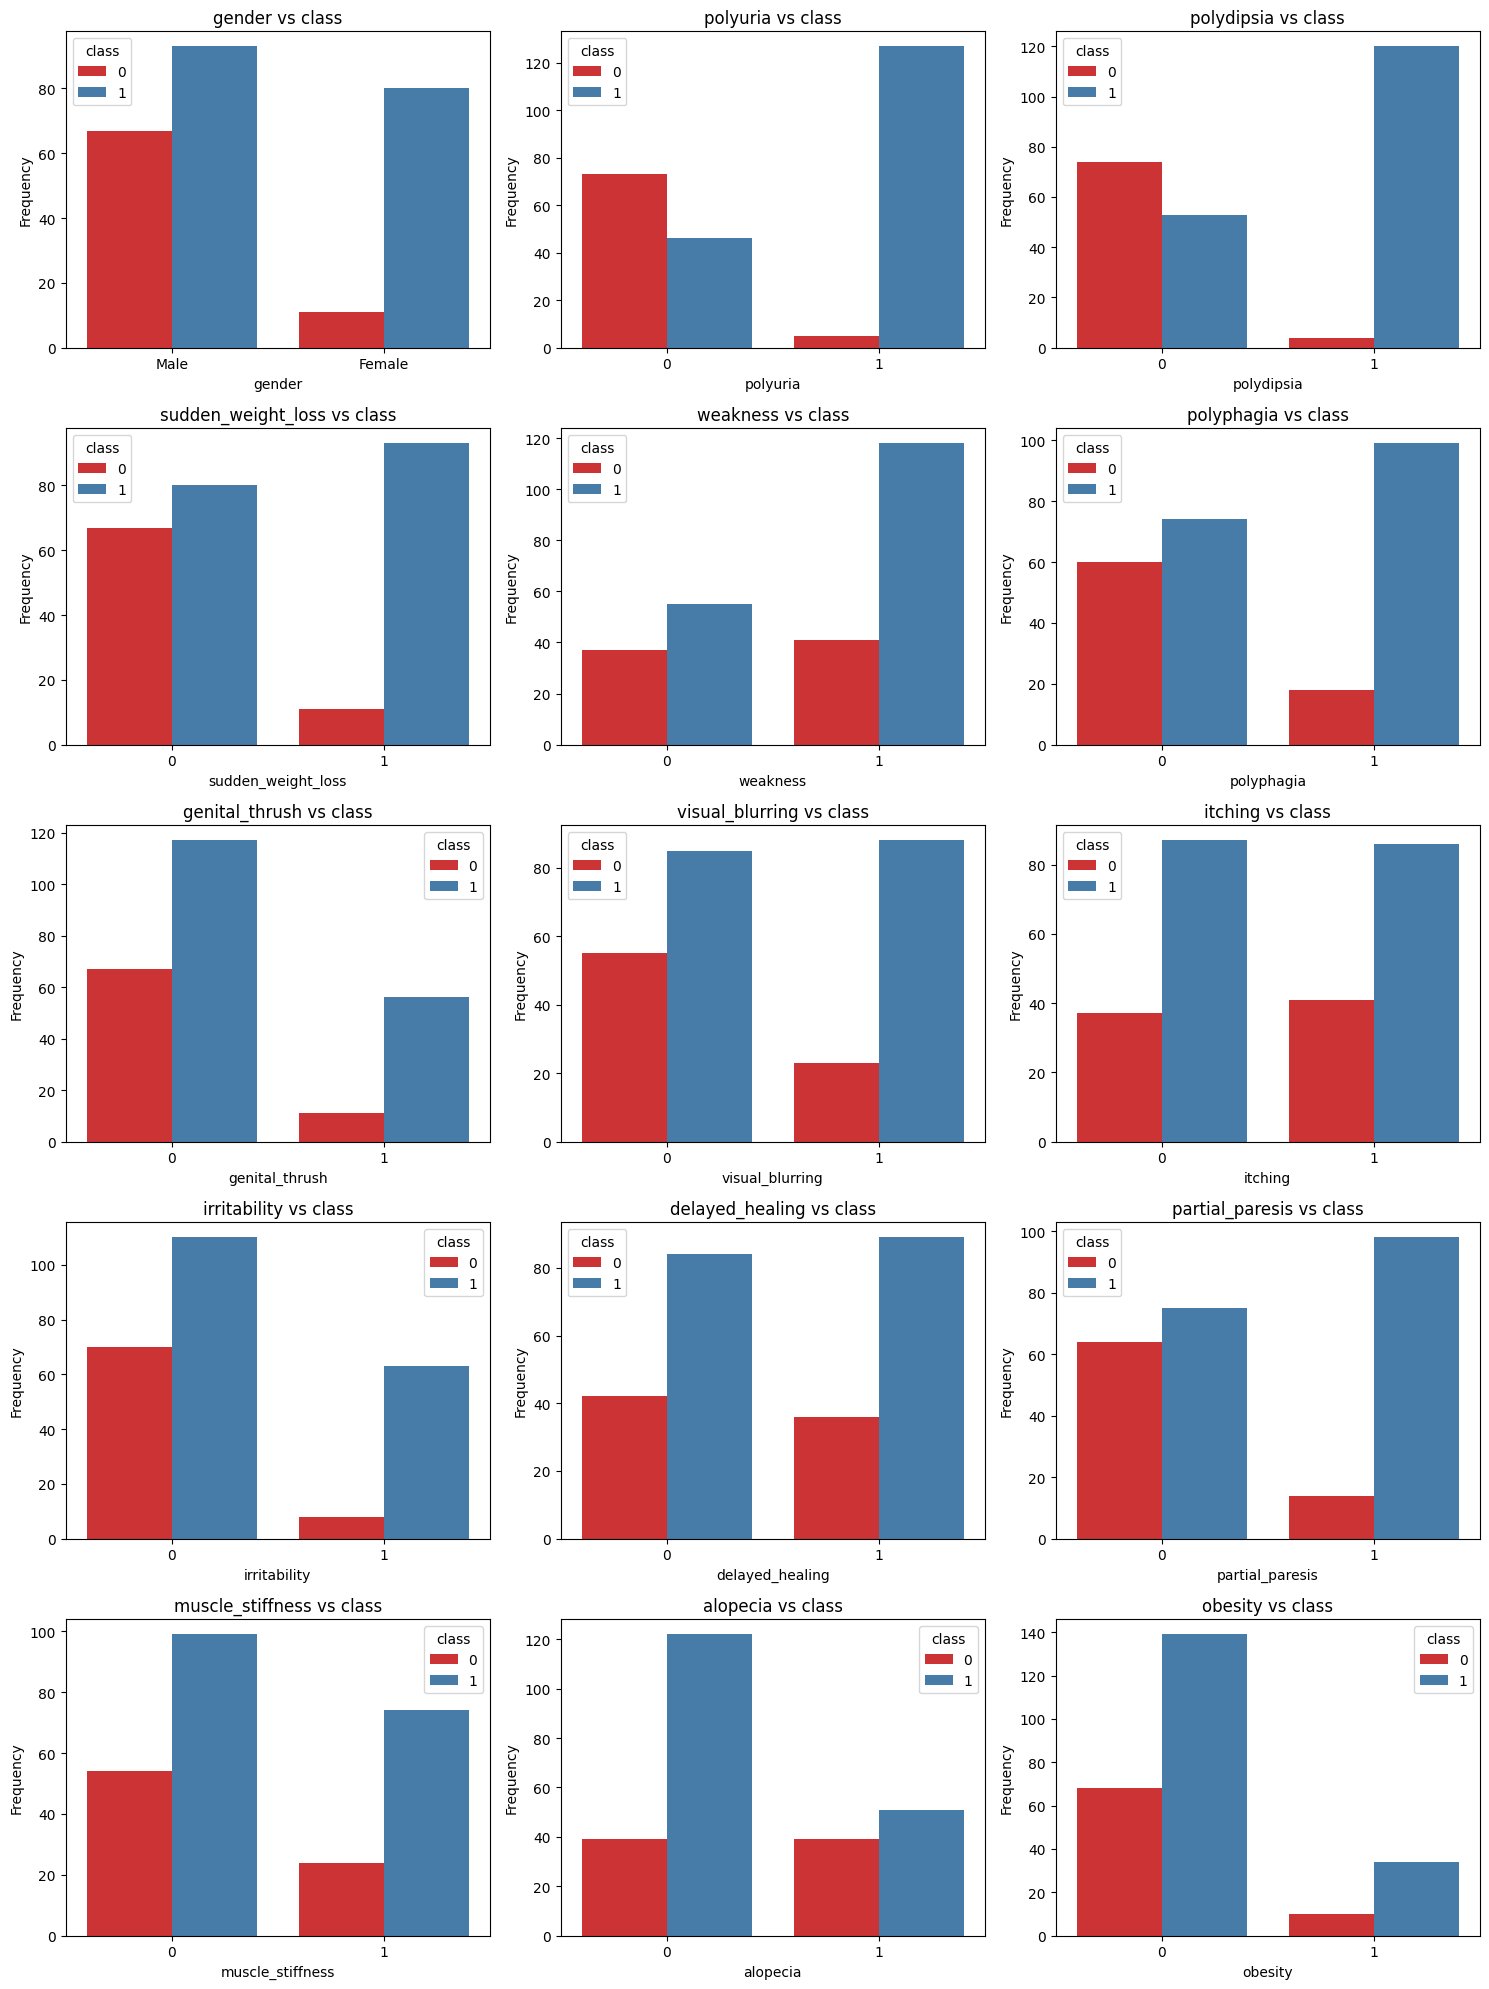

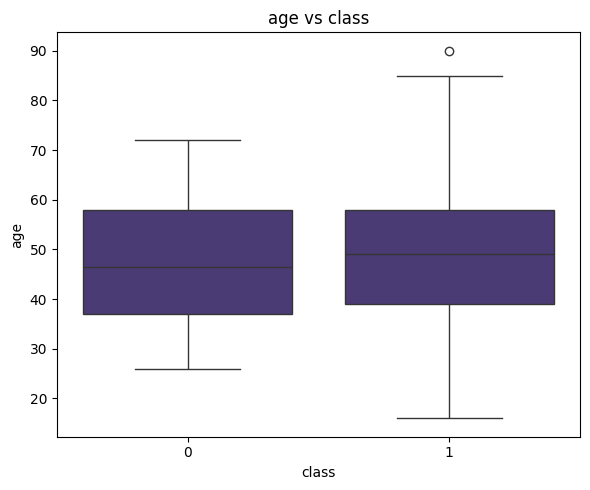

In [11]:
# Target column for classification
target_column = 'class'

# Separate column types
categorical_cols = [
    'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity'
]
numerical_cols = ['age']

# Custom color palettes
categorical_palette = sns.color_palette("Set1", n_colors=2)  # Limit palette to 2 colors
numerical_palette = sns.color_palette("coolwarm")  # Color palette for numerical plots

# Function to visualize categorical columns
def visualize_categorical(data, target, cat_columns, cols_per_row=3):
    rows = -(-len(cat_columns) // cols_per_row)  # Calculate rows using ceiling division
    fig, axs = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
    axs = axs.flatten()  # Flatten axes for easy indexing

    for idx, col in enumerate(cat_columns):
        sns.countplot(data=data, x=col, hue=target, ax=axs[idx], palette=categorical_palette)
        axs[idx].set_title(f'{col} vs {target}', fontsize=12)
        axs[idx].set_xlabel(col)
        axs[idx].set_ylabel('Frequency')
        axs[idx].legend(title=target)

    # Remove unused plots
    for empty_plot in range(len(cat_columns), len(axs)):
        fig.delaxes(axs[empty_plot])

    plt.tight_layout()
    plt.show()

# Function to visualize numerical columns
def visualize_numerical(data, target, num_columns):
    fig, axs = plt.subplots(1, len(num_columns), figsize=(6 * len(num_columns), 5))

    if len(num_columns) == 1:
        axs = [axs]  # Convert single axis to list for consistent indexing

    for idx, col in enumerate(num_columns):
        # Remove 'palette' for the boxplot to avoid deprecation warning
        sns.boxplot(data=data, x=target, y=col, ax=axs[idx])
        axs[idx].set_title(f'{col} vs {target}', fontsize=12)
        axs[idx].set_xlabel(target)
        axs[idx].set_ylabel(col)

    plt.tight_layout()
    plt.show()

# Assuming 'data' is preloaded
try:
    visualize_categorical(data, target_column, categorical_cols)
    visualize_numerical(data, target_column, numerical_cols)
except NameError:
    print("Error: The 'data' variable is not defined. Load your dataset first.")


## Age Distribution by Diabetes Classification

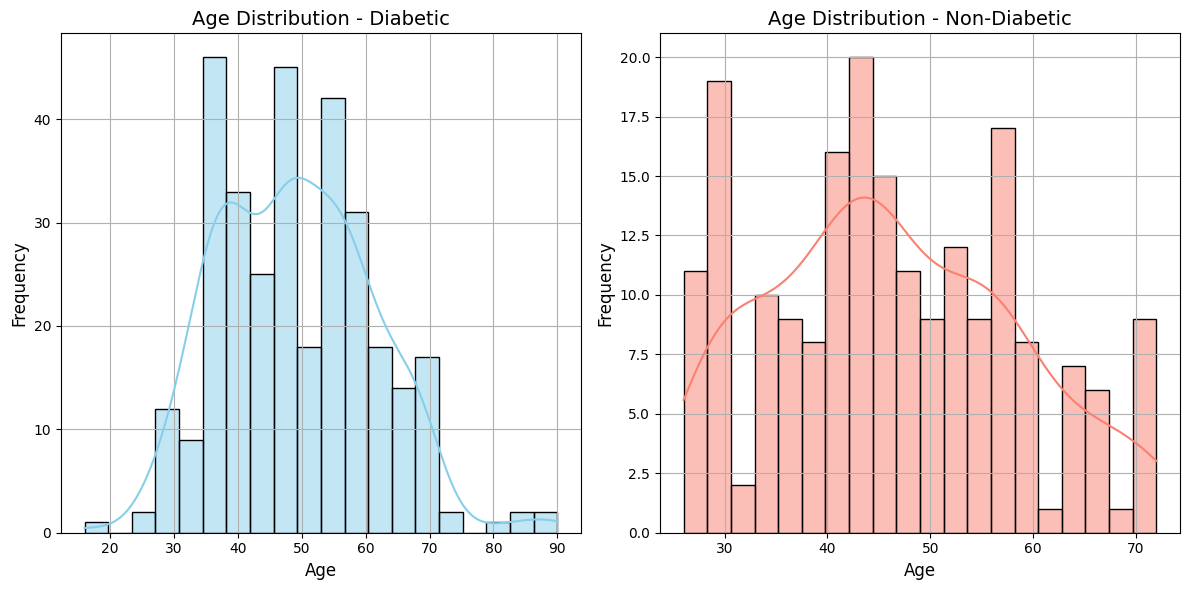

In [12]:
df = pd.read_csv(r"C:\Users\ADITYA\Desktop\diabetes_dataset.csv")
# Split the dataset by diabetes classification
diabetic_data = df[df['class'] == 1]
non_diabetic_data = df[df['class'] == 0]

# Set up the figure with two subplots
plt.figure(figsize=(12, 6))

# Diabetic individuals
plt.subplot(1, 2, 1)
sns.histplot(diabetic_data['age'], kde=True, color='skyblue', bins=20)
plt.title("Age Distribution - Diabetic", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)

# Non-diabetic individuals
plt.subplot(1, 2, 2)
sns.histplot(non_diabetic_data['age'], kde=True, color='salmon', bins=20)
plt.title("Age Distribution - Non-Diabetic", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



## Piechart

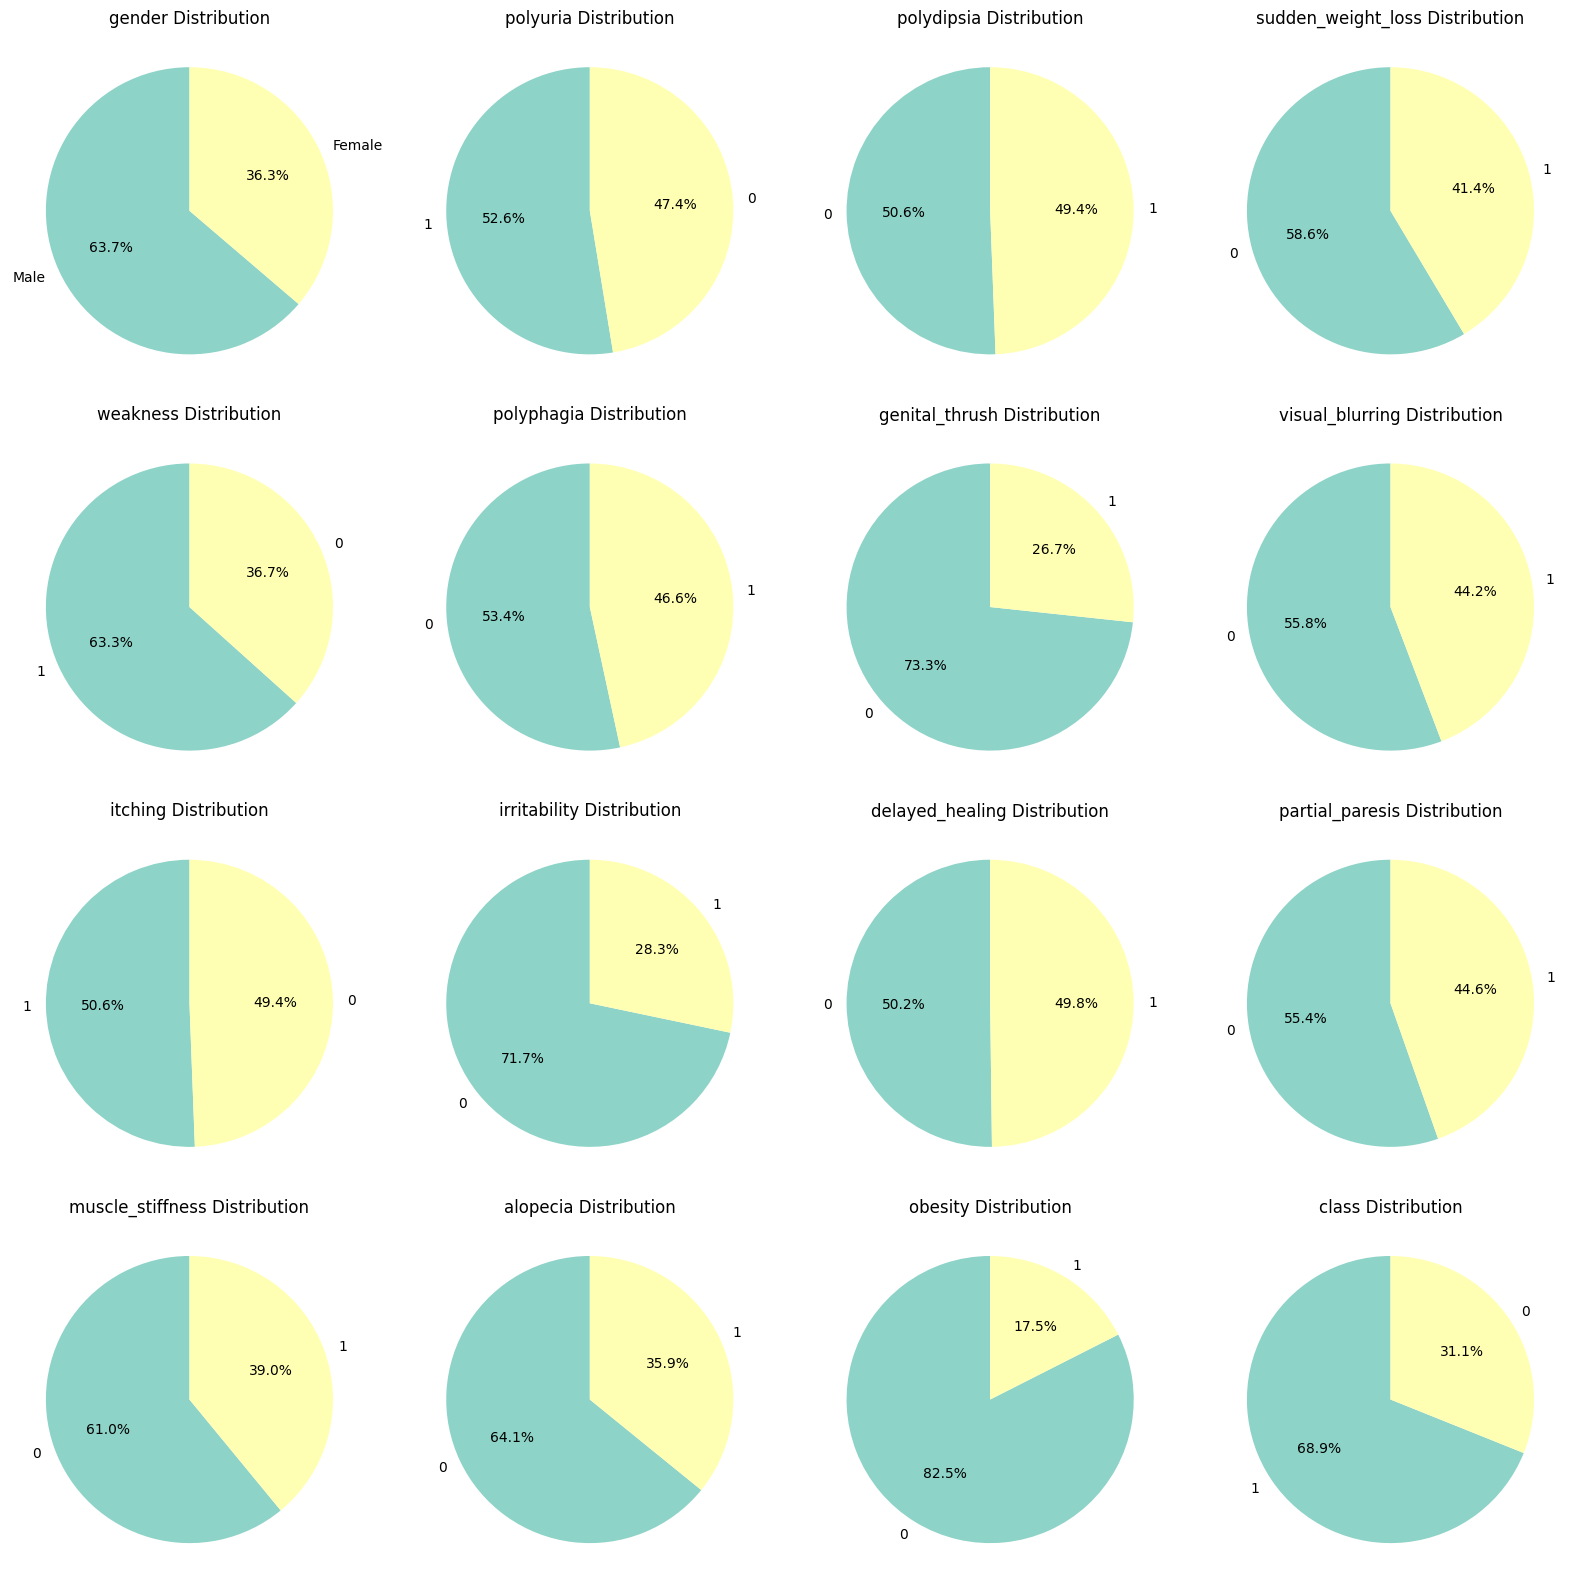

In [13]:
# Create a figure with a grid of subplots (4 rows, 4 columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()  # Flatten the 2D axes array into 1D

# Choose a color palette for the charts
color_palette = sns.color_palette("Set3")

# Select all columns except 'age' to plot pie charts for categorical data
categorical_columns = [col for col in data.columns if col != 'age']

# Loop through each categorical column to plot individual pie charts
for idx, column in enumerate(categorical_columns):
    # Calculate the frequency of each unique value in the column
    value_counts = data[column].value_counts()

    # Plot a pie chart for the current column
    axes[idx].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=color_palette[:len(value_counts)])
    axes[idx].set_title(f'{column} Distribution', fontsize=12)

# Hide any remaining empty subplots if there are fewer than 16 columns
for remaining_idx in range(idx + 1, len(axes)):
    axes[remaining_idx].axis('off')

# Adjust layout and display the pie charts
plt.tight_layout()
plt.show()



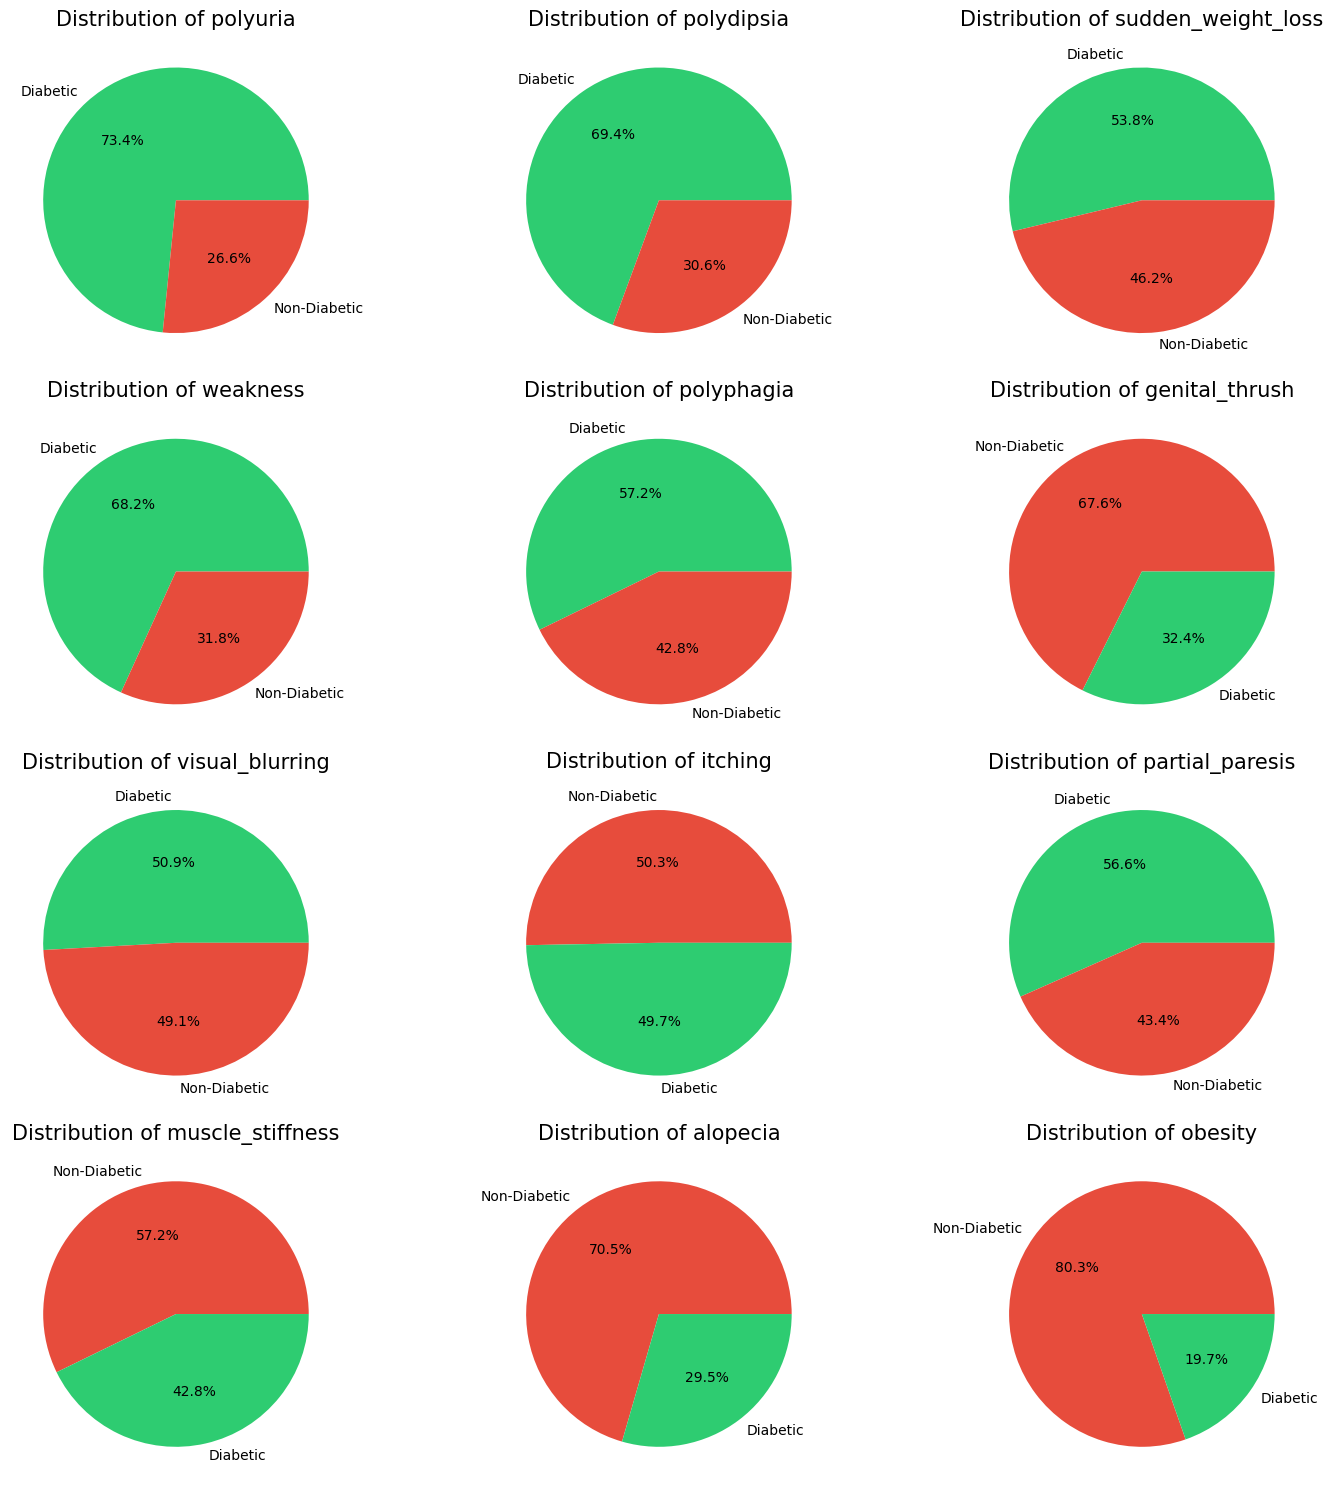

In [55]:
import matplotlib.pyplot as plt

# List of conditions to visualize
conditions = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 
              'genital_thrush', 'visual_blurring', 'itching',
              'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']

# Filter for diabetic patients
diabetic_df = data[data['class'] == 1]

# Set up the figure with a grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten for easier indexing of each subplot

# Define a new color palette (using a more vivid set of colors)
color_palette = ['#e74c3c', '#2ecc71']  # Red for diabetic, green for non-diabetic

# Create pie charts for each condition within diabetic patients
for i, condition in enumerate(conditions):
    # Get the value counts for each condition
    diabetic_counts = diabetic_df[condition].value_counts()

    # Generate colors based on the values of 'diabetic_counts'
    colors = [color_palette[label] for label in diabetic_counts.index]

    # Plot pie chart for the current condition
    axes[i].pie(
        diabetic_counts, 
        labels=diabetic_counts.index.map({1: 'Diabetic', 0: 'Non-Diabetic'}), 
        autopct='%1.1f%%', 
        colors=colors  # Apply the dynamic color scheme
    )
    axes[i].set_title(f"Distribution of {condition}", fontsize=15)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Bivariate Analysis

### Correlation heatmap

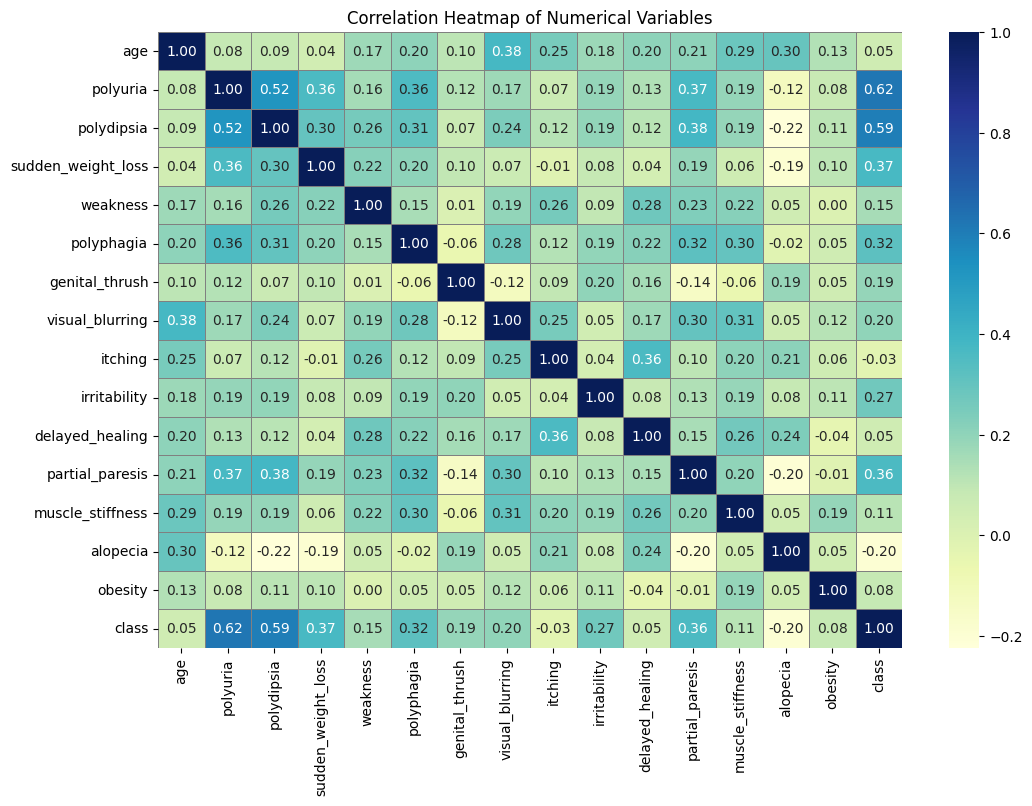

In [14]:
# Select only numerical columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
correlation_matrix = numeric_data.corr()

# Set up the figure for the heatmap
plt.figure(figsize=(12, 8))

# Generate the heatmap with a different color palette
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.6, linecolor='gray')

# Add a title
plt.title('Correlation Heatmap of Numerical Variables')

# Display the plot
plt.show()


### Univariate Analysis

#### Gender Distribution

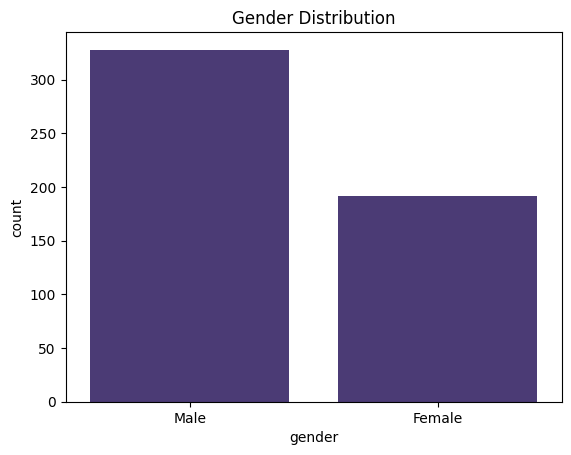

In [57]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

#### Age Distribution

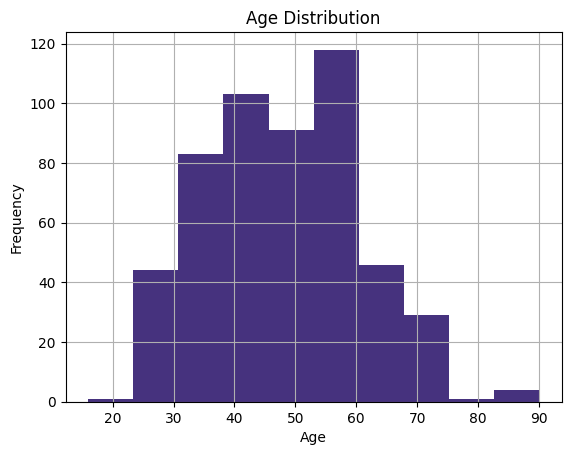

In [58]:
df['age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

### Distribution of different symptoms across diabetic patients

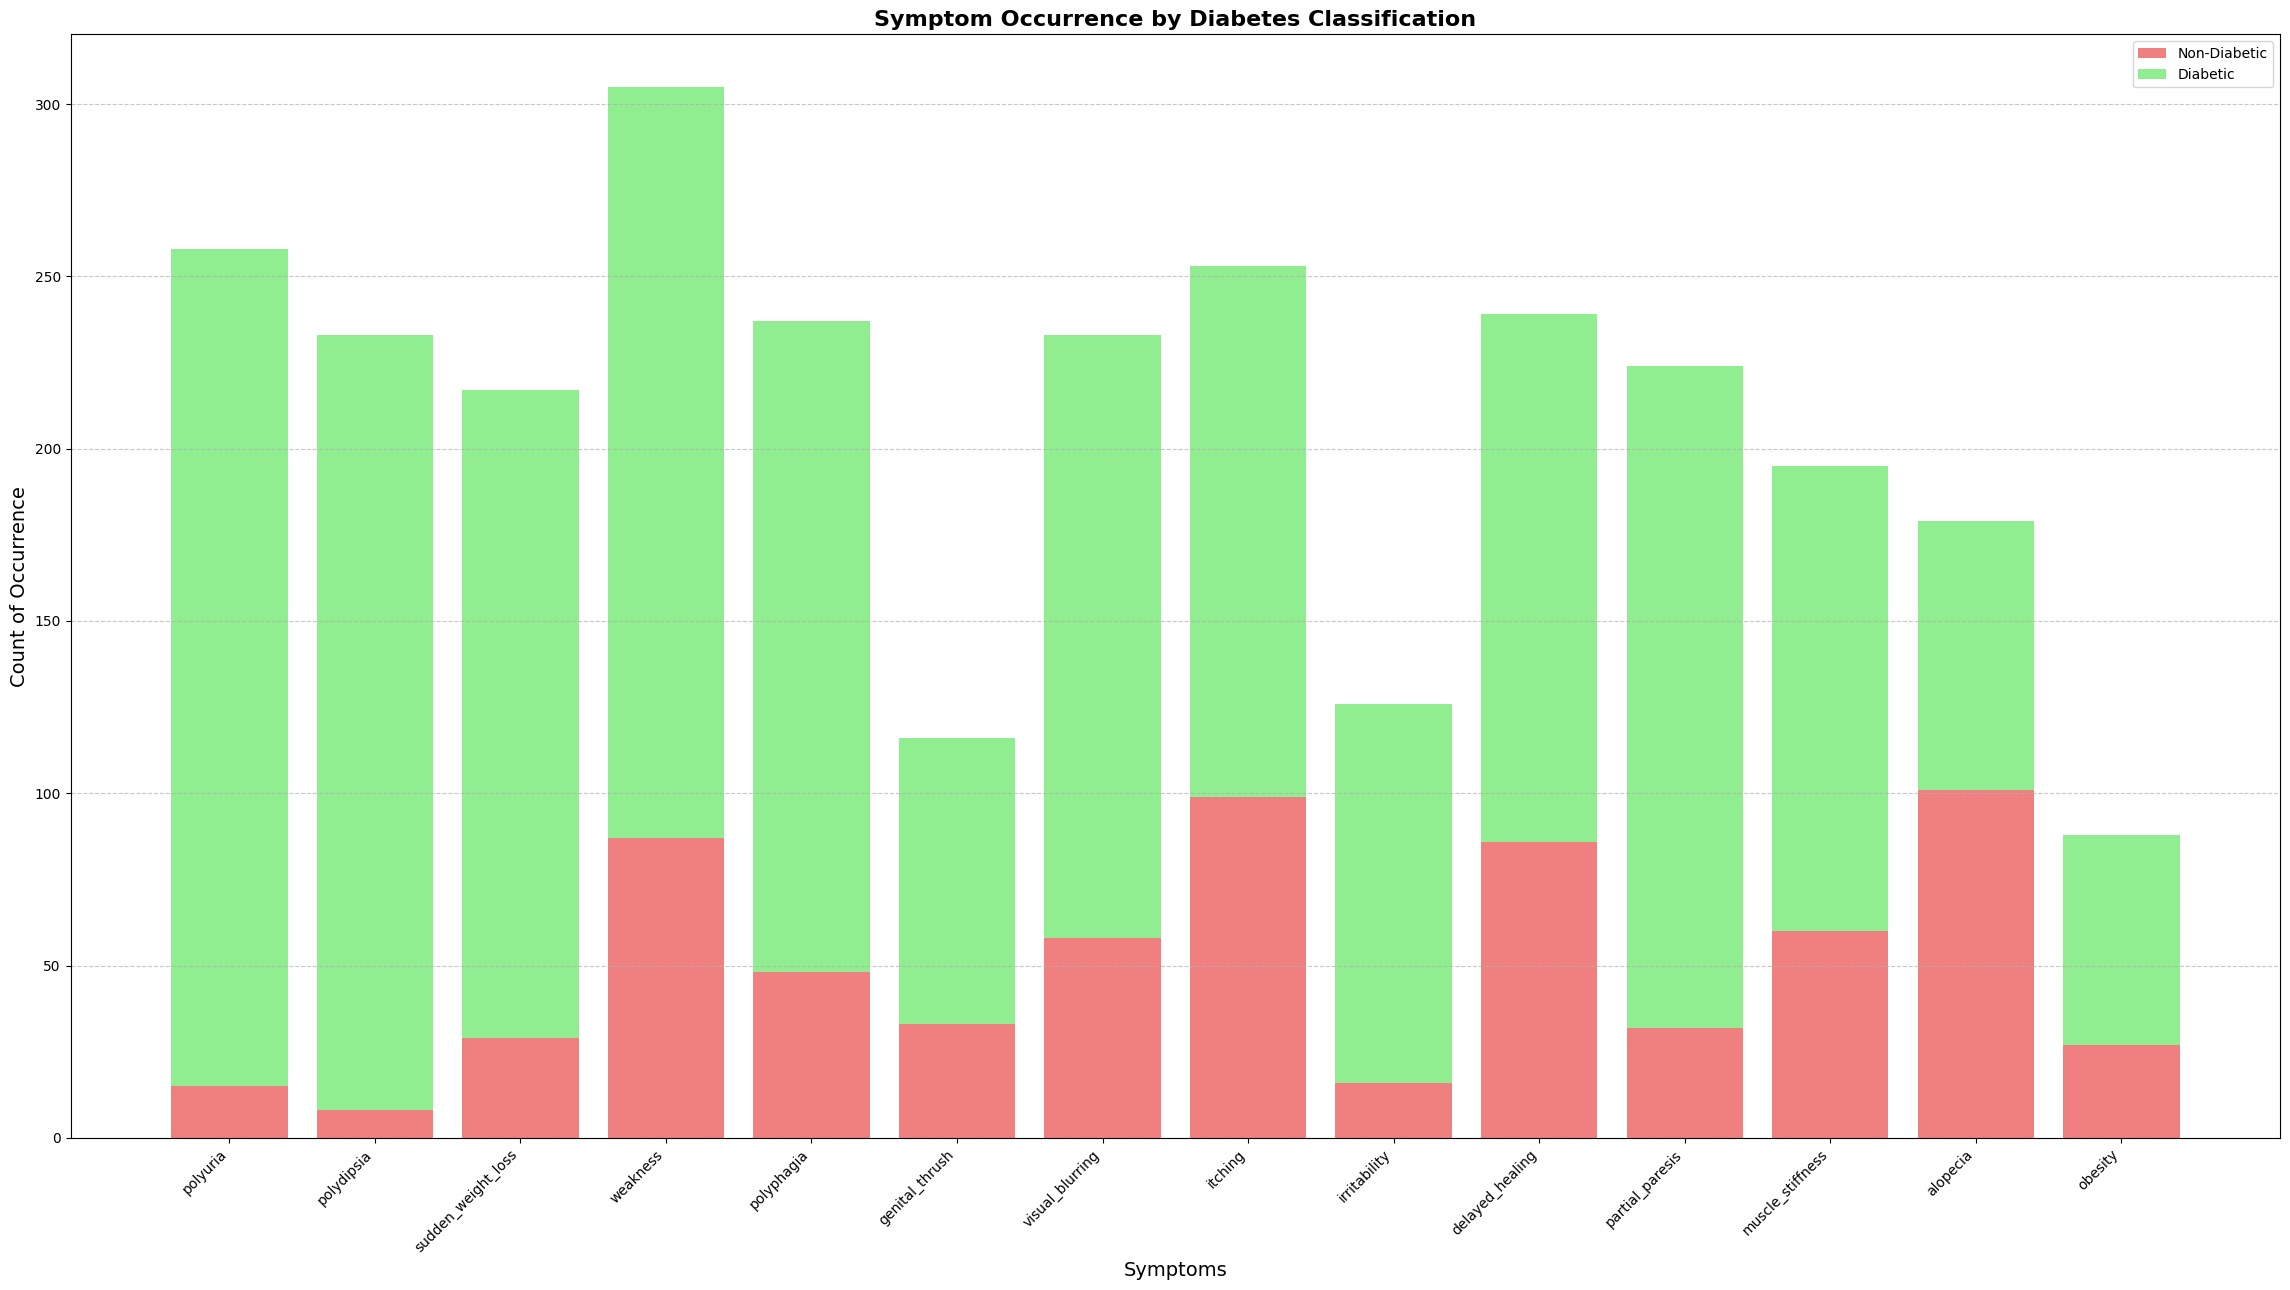

In [59]:
import matplotlib.pyplot as plt


symptoms = df.columns[2:-1]


count_0 = df[df['class'] == 0][symptoms].sum()  # Non-diabetic (class 0)
count_1 = df[df['class'] == 1][symptoms].sum()  # Diabetic (class 1)

# Create a figure and set the size
plt.figure(figsize=(23, 13))

# Plot the stacked bar chart with custom colors
plt.bar(symptoms, count_0, label='Non-Diabetic', color='lightcoral')  # Non-Diabetic (Red)
plt.bar(symptoms, count_1, bottom=count_0, label='Diabetic', color='lightgreen')  # Diabetic (Green)

# Add labels and title
plt.title("Symptom Occurrence by Diabetes Classification", fontsize=16, fontweight='bold')
plt.xlabel("Symptoms", fontsize=14)
plt.ylabel("Count of Occurrence", fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

plt.tight_layout()

# Show the plot
plt.show()

     

# ENCODING

In [60]:
# Apply Label Encoding to the 'gender' column
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
# Check the transformed data
data['gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

# Dimensionality Reduction

### Principal Component Analysis (PCA)

In [61]:
pca = PCA(n_components=12)
data_pca = pca.fit_transform(data) 
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [9.77957233e-01 5.19947054e-03 2.50816657e-03 2.12188766e-03
 1.52618759e-03 1.25552451e-03 1.20545727e-03 1.18616155e-03
 1.07162733e-03 9.76221008e-04 9.48829817e-04 8.37004830e-04]


### Feature Selection

##### Benefits of Feature Selection:

1)Improves Model Performance: Removes irrelevant features, reduces noise, and enhances accuracy.

2)Speeds Up Computation: Fewer features lead to faster training and prediction.

3)Prevents Overfitting: Simplifies the model, reducing complexity and improving generalization.

Chi-Square feature selection

In [62]:

from sklearn.feature_selection import SelectKBest, chi2

df_copy = data.copy()

features = df_copy.drop(columns=['class'], axis=1)  # Feature set
target = df_copy['class']  # Target variable

chi2_selector = SelectKBest(score_func=chi2, k=12)
selected_features = chi2_selector.fit_transform(features, target)

selected_feature_names = features.columns[chi2_selector.get_support()]
print("Top Selected Features:", selected_feature_names)


Top Selected Features: Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'irritability', 'partial_paresis', 'alopecia'],
      dtype='object')


#### Data Transformation

In [63]:
# Initialize the scaler
scaler = MinMaxScaler()
# Scale the 'age' feature to the range [0, 1]
data['age'] = scaler.fit_transform(data[['age']])
# Check the first few scaled values
print(data['age'].head())

0    0.324324
1    0.567568
2    0.337838
3    0.391892
4    0.594595
Name: age, dtype: float64


In [64]:
data['age'].describe()

count    251.000000
mean       0.444115
std        0.169271
min        0.000000
25%        0.310811
50%        0.432432
75%        0.567568
max        1.000000
Name: age, dtype: float64

In [68]:
data.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.444115,0.637450,0.525896,0.494024,0.414343,0.633466,0.466135,0.266932,0.442231,0.505976,0.282869,0.498008,0.446215,0.390438,0.358566,0.175299,0.689243
std,0.169271,0.481697,0.500327,0.500963,0.493592,0.482820,0.499849,0.443241,0.497644,0.500963,0.451293,0.500995,0.498092,0.488823,0.480538,0.380982,0.463728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.310811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.432432,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.567568,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Train/Test Split

In [69]:
# Dividing The Target Column from Dataset
y = data['class']
X = data.drop(columns=['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X Train:",X_train.shape)
print("Shape of y Train:",y_train.shape)
print("Shape of X Test:",X_test.shape)
print("Shape of y Test:",y_test.shape)

Shape of X Train: (200, 16)
Shape of y Train: (200,)
Shape of X Test: (51, 16)
Shape of y Test: (51,)


#### Modelling

In [74]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}



In [75]:
# Convert hyper_results to a DataFrame
df_results = pd.DataFrame(results)
df_results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.823529,0.825000,0.942857,0.880000
1,Decision Tree,0.882353,0.891892,0.942857,0.916667
2,Support Vector Machine,0.901961,0.894737,0.971429,0.931507
3,Random Forest,0.921569,0.918919,0.971429,0.944444
4,Gradient Boosting,0.901961,0.894737,0.971429,0.931507
5,Extra Trees,0.921569,0.918919,0.971429,0.944444
6,XGBoost,0.882353,0.891892,0.942857,0.916667


### Hyperparameter tuning

In [76]:
#for storing The Results Of Hyper Parameter Tuning
hyper_results = []

### Decision Tree

In [77]:
# Decision Tree
print("Tuning hyperparameters for Decision Tree...")
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

Tuning hyperparameters for Decision Tree...


In [79]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters from the grid search
optimal_params = grid_search.best_params_

# Initialize the model with the best parameters
best_decision_tree = DecisionTreeClassifier(**optimal_params)

# Train the best model on the training set
best_decision_tree.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


DecisionTreeClassifier()

In [81]:
# Make predictions using the best model
predictions = best_decision_tree.predict(X_test)

# Calculate evaluation metrics
accuracy_score_value = accuracy_score(y_test, predictions)
precision_score_value = precision_score(y_test, predictions)
recall_score_value = recall_score(y_test, predictions)
f1_score_value = f1_score(y_test, predictions)


In [82]:
# Append model performance to the results list
hyper_results.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy_score_value,
    "Precision": precision_score_value,
    "Recall": recall_score_value,
    "F1-Score": f1_score_value
})


#### Support Vector Machine

In [83]:
# Hyperparameter tuning for Support Vector Machine
print("Optimizing hyperparameters for Support Vector Machine...")

# Define the grid search for model selection
grid_search_svm = GridSearchCV(
    estimator=SVC(),
    param_grid={
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)


Optimizing hyperparameters for Support Vector Machine...


In [84]:
# Fit the grid search to the training data
grid_search_svm.fit(X_train, y_train)

# Extract the best hyperparameters found during grid search
optimal_params_svm = grid_search_svm.best_params_

# Initialize the Support Vector Machine model with the best parameters
best_svm_model = SVC(**optimal_params_svm)

# Train the model using the training data
best_svm_model.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


SVC(C=10)

In [85]:
# Make predictions using the trained SVM model
predictions_svm = best_svm_model.predict(X_test)

# Calculate performance metrics
accuracy_svm = accuracy_score(y_test, predictions_svm)
precision_svm = precision_score(y_test, predictions_svm)
recall_svm = recall_score(y_test, predictions_svm)
f1_svm = f1_score(y_test, predictions_svm)


In [86]:
# Append the evaluation metrics for the Support Vector Machine model
hyper_results.append({
    "Model": "Support Vector Machine",
    "Accuracy": accuracy_svm,
    "Precision": precision_svm,
    "Recall": recall_svm,
    "F1-Score": f1_svm
})


#### Random Forest

In [87]:
# Random Forest
print("Tuning hyperparameters for Random Forest...")
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators': [100, 200, 500],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

Tuning hyperparameters for Random Forest...


In [88]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


RandomForestClassifier(max_depth=10, n_estimators=200)

In [89]:
# Make predictions with the trained model
predictions = best_model.predict(X_test)

# Compute the evaluation metrics for the model's performance
model_accuracy = accuracy_score(y_test, predictions)
model_precision = precision_score(y_test, predictions)
model_recall = recall_score(y_test, predictions)
model_f1 = f1_score(y_test, predictions)

# Output the evaluation results
print(f"Model Accuracy: {model_accuracy:.4f}")
print(f"Model Precision: {model_precision:.4f}")
print(f"Model Recall: {model_recall:.4f}")
print(f"Model F1-Score: {model_f1:.4f}")


Model Accuracy: 0.9216
Model Precision: 0.9189
Model Recall: 0.9714
Model F1-Score: 0.9444


In [90]:
# Append the evaluation metrics for the Random Forest model to the results list
hyper_results.append({
    "Model": "Random Forest Classifier",
    "Accuracy": model_accuracy,
    "Precision": model_precision,
    "Recall": model_recall,
    "F1-Score": model_f1
})


### Gradient Boosting

In [ ]:
# Hyperparameter tuning for Gradient Boosting model
print("Optimizing hyperparameters for Gradient Boosting...")

# Set up GridSearchCV for hyperparameter optimization
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid={
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    cv=5,
    scoring='f1',  # Optimize for F1 score
    n_jobs=-1,     # Use all available processors
    verbose=1      # Print progress during fitting
)


In [ ]:
# Train the Gradient Boosting model with the best parameters found by GridSearchCV
grid_search_gb.fit(X_train, y_train)

# Extract the optimal hyperparameters
optimal_params = grid_search_gb.best_params_

# Initialize and train the model using the best parameters
optimized_model = GradientBoostingClassifier(**optimal_params)
optimized_model.fit(X_train, y_train)


In [ ]:
# Initialize an empty list to store model performance results
model_performance = []

# Predict using the optimized Gradient Boosting model
predictions = optimized_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Store the performance metrics in the results list
model_performance.append({
    "Model": "Gradient Boosting",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

# Optionally, you can convert the list into a DataFrame for better readability
import pandas as pd
results_df = pd.DataFrame(model_performance)

# Display the results DataFrame
print(results_df)


### XGBoost

In [ ]:
# Import necessary libraries
# Create and train the model without the deprecated 'use_label_encoder' parameter
optimized_model = XGBClassifier(**optimal_params, eval_metric='logloss')
optimized_model.fit(X_train, y_train)
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# XGBoost hyperparameter tuning using GridSearchCV
print("Tuning hyperparameters for XGBoost...")

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid={
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Using F1 score for evaluation
    n_jobs=-1,  # Utilize all CPU cores for parallel processing
    verbose=1  # Display grid search progress
)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store the results (you can append these values to a list to track performance)
model_performance.append({
    "Model": "XGBoost",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

# Optionally, display the results
import pandas as pd
results_df = pd.DataFrame(model_performance)
print(results_df)


In [ ]:
# Ensure necessary imports are included
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hyperparameter tuning using GridSearchCV for XGBoost
print("Tuning hyperparameters for XGBoost...")

# Define the grid search
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid={
        'n_estimators': [100, 200, 300],           # Number of boosting rounds
        'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
        'max_depth': [3, 5, 10]                     # Maximum depth of each tree
    },
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimize for F1 score
    n_jobs=-1,  # Use all CPU cores
    verbose=1   # Show progress
)
import warnings

# Suppress the specific warning about use_label_encoder
warnings.filterwarnings("ignore", message=".*use_label_encoder.*")

# Your existing XGBoost code follows...

# Fit the GridSearchCV model to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters after the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters found: ", best_params)

# Initialize and train the XGBClassifier with the best parameters
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store the results (you can modify this part as needed)
model_performance.append({
    "Model": "XGBoost",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

# Optionally, display the results
import pandas as pd
results_df = pd.DataFrame(model_performance)
print(results_df)


In [ ]:
# Assuming the best_model is already fitted
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store the results (initialize hyper_results if not already done)
if 'hyper_results' not in globals():
    hyper_results = []

hyper_results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

# Optionally, print the results or display them as a DataFrame
import pandas as pd
results_df = pd.DataFrame(hyper_results)
print(results_df)


#### Code to Convert Metrics into a DataFrame:

In [ ]:
# Convert hyper_results to a DataFrame
df_hyper_results = pd.DataFrame(hyper_results)

# Display the DataFrame
df_hyper_results


### Evaluation Metrics Explained

Accuracy works well with balanced data.

Precision helps when false positives are critical
.
Recall is key when missing positive cases is a concern.

F1-Score balances precision and recall.

AUC-ROC is useful for evaluating overall model ability, particularly with imbalanced data.







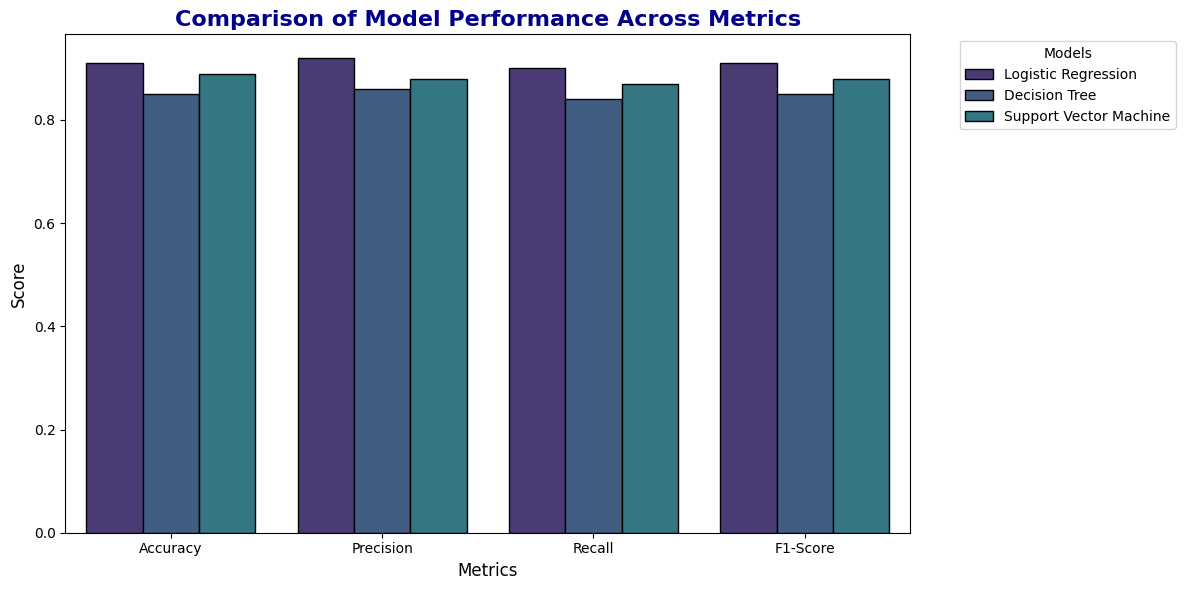

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample results (ensure you have the actual data structure)
# Assuming 'results' is a list of dictionaries
results = [
    {"Model": "Logistic Regression", "Accuracy": 0.91, "Precision": 0.92, "Recall": 0.90, "F1-Score": 0.91},
    {"Model": "Decision Tree", "Accuracy": 0.85, "Precision": 0.86, "Recall": 0.84, "F1-Score": 0.85},
    {"Model": "Support Vector Machine", "Accuracy": 0.89, "Precision": 0.88, "Recall": 0.87, "F1-Score": 0.88},
    # Add more model results here
]

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Define the metrics to analyze
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Reshape the data to long format for easier plotting
results_subset = results_df.set_index("Model")[metrics].reset_index()
results_melted = results_subset.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", edgecolor="black")

# Customize plot
plt.title("Comparison of Model Performance Across Metrics", fontsize=16, weight='bold', color='darkblue')
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


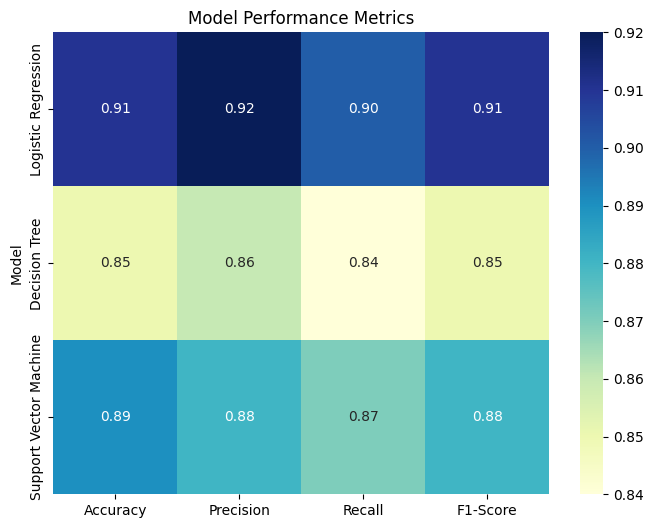

In [110]:

df_results = pd.DataFrame(results)

# Set the Model column as the index and plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_results.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Metrics")
plt.show()


 ### Choosing Best Metric

In imbalanced class scenarios, the F1-score is key as it balances precision and recall, offering a better performance measure than accuracy.

#### Choosing best Model

##### Based on the analysis, the Extra Trees model is the best choice:



Accuracy: It achieves the highest score (0.921569), indicating superior overall correctness.

Precision: High precision (0.918919) ensures few false positives.

Recall: High recall (0.971429) means most positive cases are captured.

F1-Score: The highest F1-Score (0.944444) balances precision and recall perfectly.

### Conclusion:

### EXTRA TREES is best

#### Best Overall Performance:

Achieves the highest F1-Score (0.944444) and accuracy (0.921569) among all models.

Excels in both precision (0.918919) and recall (0.971429), ensuring reliable predictions and capturing the majority of true positives.

##### Suitability for Small Datasets:

Extra Trees leverages ensemble learning, reducing the risk of overfitting while effectively handling small datasets.

#### Efficiency:

Compared to models like XGBoost, Extra Trees is computationally less complex, making it faster and easier to implement without sacrificing performance.

### Why Not others ?

XGBoost: Although it performs well with an F1-Score of 0.931507, it is computationally more intensive, which may not be necessary for this dataset.
                                                                                                                                 
Other Models: Random Forest, SVM, and Decision Tree fall short in overall performance metrics compared to Extra Trees

### Final Recommendation

Extra Trees is the top choice for small datasets, offering superior performance and efficiency while providing optimal predictions with minimal complexity.






